<a href="https://colab.research.google.com/github/shanaka-desoysa/short-notes/blob/main/docs/Python/Pandas/Quandl_Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Quandl Data

## Install Quandl

In [3]:
!pip install quandl -q

In [10]:
import pandas as pd
import quandl

## Get Data and Save in Pandas DataFrame
If run into rate limits, register at Quandl and provide `api_key` in the get call.

In [14]:
df = quandl.get(
    "FRED/DEXCHUS", 
    start_date='2014-01-01', 
    end_date='2020-10-01'
).rename(columns={'Value':'DEXCHUS'})
df.index.name = 'ds'

In [18]:
df

DEXCHUS
ds                 
2014-01-02   6.0504
2014-01-03   6.0505
2014-01-06   6.0524
2014-01-07   6.0507
2014-01-08   6.0510
...             ...
2020-09-25   6.8220
2020-09-28   6.8106
2020-09-29   6.8150
2020-09-30   6.7896
2020-10-01   6.7898

[1690 rows x 1 columns]

## Plot Time Series Data

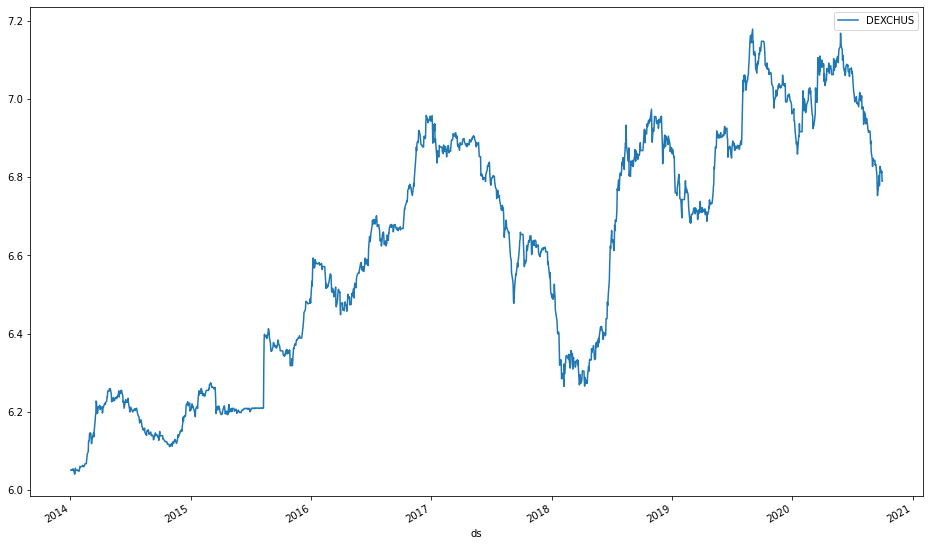

In [16]:
df.plot(figsize=(16, 10))

## Find Missing Data

In [11]:
pd.date_range(start = df.index.min(), end = df.index.max()).difference(df.index)

DatetimeIndex(['2014-01-04', '2014-01-05', '2014-01-11', '2014-01-12',
               '2014-01-18', '2014-01-19', '2014-01-20', '2014-01-25',
               '2014-01-26', '2014-02-01',
               ...
               '2020-08-30', '2020-09-05', '2020-09-06', '2020-09-07',
               '2020-09-12', '2020-09-13', '2020-09-19', '2020-09-20',
               '2020-09-26', '2020-09-27'],
              dtype='datetime64[ns]', length=775, freq=None)

## Fill Missing Data with `ffill()` or `bfill()`

DEXCHUS
2014-01-02   6.0504
2014-01-03   6.0505
2014-01-04   6.0505
2014-01-05   6.0505
2014-01-06   6.0524

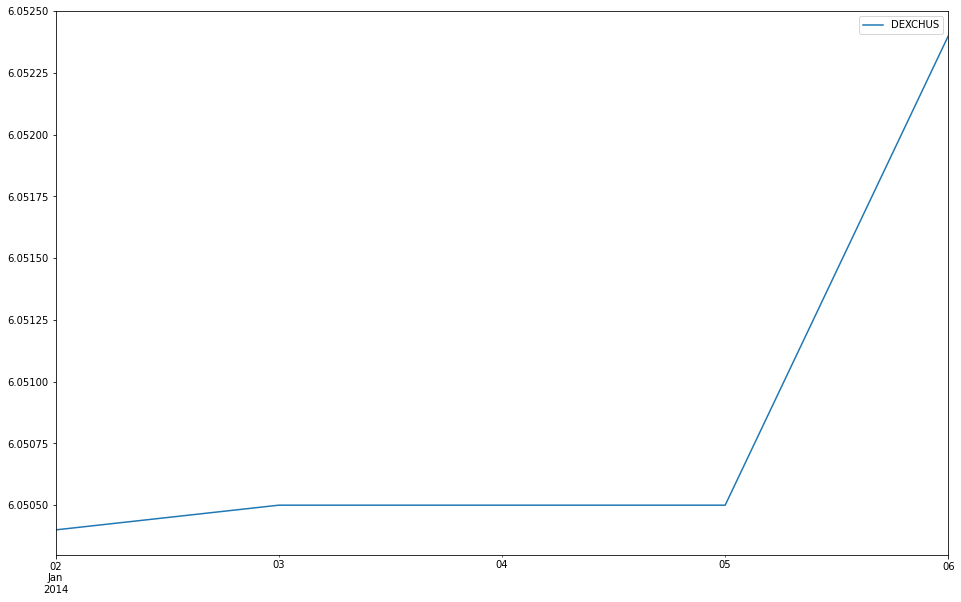

In [41]:
df_ffill = df.reindex(pd.date_range(start=df.index[0], end=df.index[-1])).ffill()

# Check missing values filled '2014-01-04', '2014-01-05'
display(df_ffill.loc['2014-01-02':'2014-01-06', :])
df_ffill.loc['2014-01-02':'2014-01-06', :].plot(figsize=(16, 10))

DEXCHUS
2014-01-02   6.0504
2014-01-03   6.0505
2014-01-04   6.0524
2014-01-05   6.0524
2014-01-06   6.0524

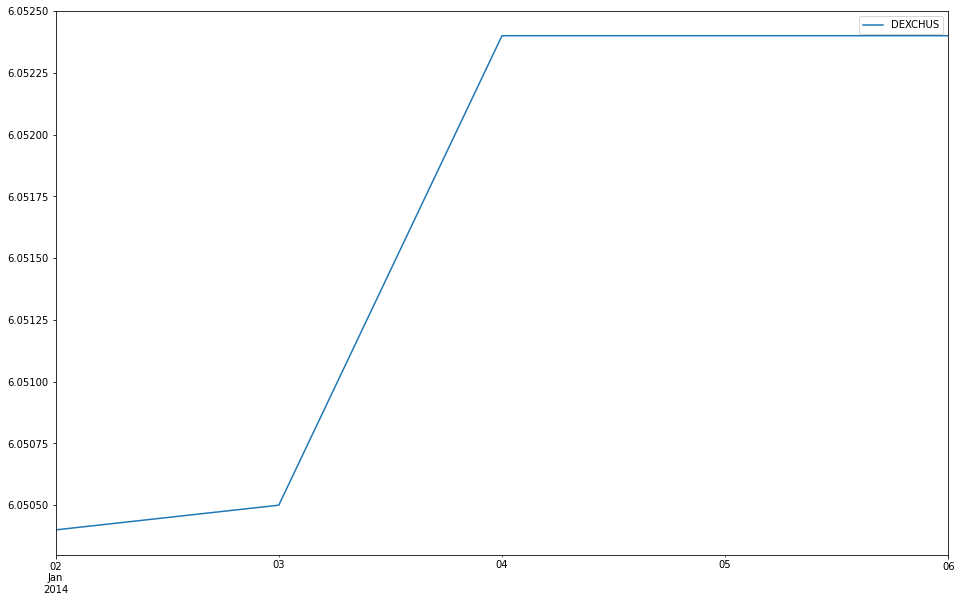

In [42]:
df_bfill = df.reindex(pd.date_range(start=df.index[0], end=df.index[-1])).bfill()

# Check missing values filled '2014-01-04', '2014-01-05'
display(df_bfill.loc['2014-01-02':'2014-01-06', :])
df_bfill.loc['2014-01-02':'2014-01-06', :].plot(figsize=(16, 10))

## Fill Missing Data with Interpolation

[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

DEXCHUS
ds                  
2014-01-02  6.050400
2014-01-03  6.050500
2014-01-04  6.051133
2014-01-05  6.051767
2014-01-06  6.052400

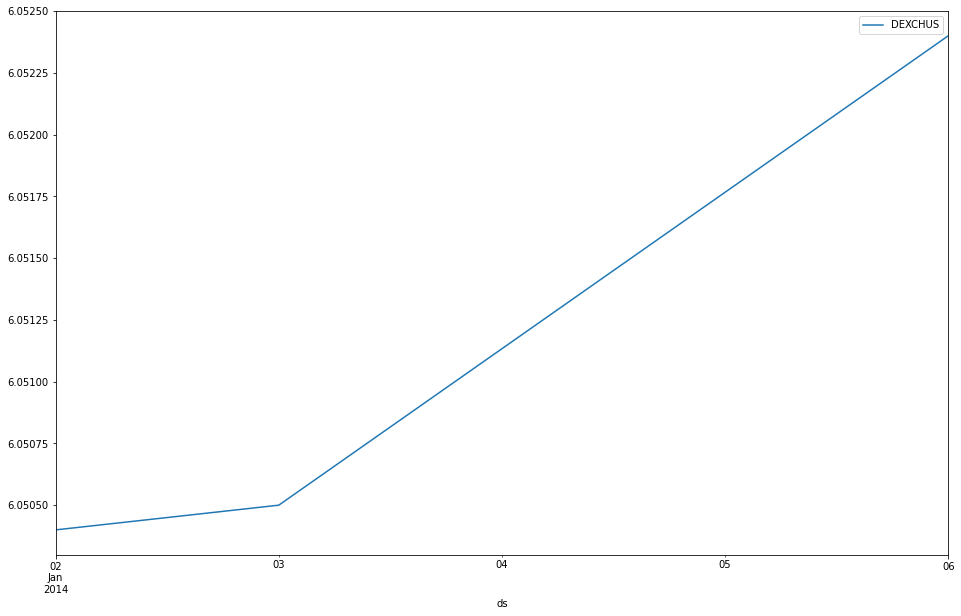

In [43]:
df_interpolate = df.resample('D').interpolate(method='time')

# Check missing values filled '2014-01-04', '2014-01-05'
display(df_interpolate.loc['2014-01-02':'2014-01-06', :])
df_interpolate.loc['2014-01-02':'2014-01-06', :].plot(figsize=(16, 10))